In [93]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('TEST (1).csv')

In [94]:
df

,windspeed,rainfall24,rainfall6,rainfallaverage,area,yield,distance,areayieldrataio,percentageofarea,darea,yielda,fgprice,dctrice
0,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


In [95]:
# Split the dataset into features and target variable
X = df.drop(['dctrice','percentageofarea','yielda','darea','areayieldrataio','rainfallaverage'], axis=1)
y = df.drop(['darea','percentageofarea','yielda','windspeed','rainfall24','rainfall6','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','distance'], axis=1)

In [96]:
# Remove the rows with zero values from the training set and testing set
mask = X['windspeed'] != 0

# Apply the mask to X_train
X = X[mask]

# Apply the mask to y_train
y = y[mask]

In [97]:
# Remove the rows with zero values from the training set and testing set
mask =y['dctrice'] != 0

# Apply the mask to y_train
y = y[mask]

# Apply the mask to X_train
X = X[mask]

In [98]:
X.shape, y.shape

((15401, 7), (15401, 1))

In [99]:
# Training and Temporary Set (80-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Temporary set into a validation set and a test set using (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [100]:

X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [101]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dctrice  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   windspeed   12320 non-null  float64
 1   rainfall24  12320 non-null  float64
 2   rainfall6   12320 non-null  float64
 3   area        12320 non-null  float64
 4   yield       12320 non-null  float64
 5   distance    12320 non-null  float64
 6   fgprice     12320 non-null  float64
dtypes: float64(7)
memory usage: 770.0 KB


In [102]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [103]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [104]:
# # Remove the rows with zero values from the training set and testing set
# mask = X_train['windspeed'] != 0

# # Apply the mask to X_train
# X_train = X_train[mask]

# # Apply the mask to y_train
# y_train = y_train[mask]

In [105]:
# # Remove the rows with zero values from the training set and testing set
# mask =y_train['dctrice'] != 0

# # Apply the mask to X_train
# X_train = X_train[mask]

# # Apply the mask to y_train
# y_train = y_train[mask]

In [106]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [107]:
# Null Remover

nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [108]:
X_train.shape,y_train.shape

((12320, 7), (12320, 1))

In [109]:
# mask = X_train['windspeed'] != 0


In [110]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [111]:
nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

In [112]:
# # Remove the rows with zero values from the training set and testing set
# mask = X_val['windspeed'] != 0

# # Apply the mask to X_train
# X_val = X_val[mask]

# # Apply the mask to y_train
# y_val = y_val[mask]

In [113]:
X_val.shape

(1540, 7)

In [114]:



from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=40, 
    min_samples_split=40, 
    min_samples_leaf=20, 
    max_leaf_nodes=100,
    random_state=42,
   
)

model.fit(X_train, y_train)


predictions = model.predict(X_test)

# Evaluate the model

mae = mean_absolute_error(y_test, predictions)
print(f'\nMean Absolute Error (Test): {mae}')



r2 = model.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

predictionsVal = model.predict(X_val)

# Evaluate the model

maev = mean_absolute_error(y_val, predictionsVal)
print(f'\nMean Absolute Error (Validation): {maev}')


r2 = model.score(X_val, y_val)
print(f'R-squared (Validation): {r2}')



C:\Users\Asus\AppData\Local\Temp\ipykernel_25832\1770697939.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)



Mean Absolute Error (Test): 6153410.180417417
R-squared (Test): 0.8297543961571204

Mean Absolute Error (Validation): 6272268.05201954
R-squared (Validation): 0.8201819565675861


In [115]:
print(['{:.2f}'.format(pred) for pred in predictions])

['493649.20', '18191239.83', '3418356.16', '3110197.11', '2476187.76', '5561985.53', '3313144.99', '493649.20', '18879663.08', '2643439.54', '493649.20', '493649.20', '29166660.78', '2345764.46', '21222983.38', '5985579.62', '2901929.42', '4878221.98', '39962780.92', '15837432.69', '493649.20', '2631928.35', '2775020.05', '930667.74', '39899047.89', '22114972.18', '4092988.21', '1052177.06', '4993171.33', '493649.20', '12760079.15', '493649.20', '13446405.40', '493649.20', '3586165.62', '493649.20', '15195801.38', '1052177.06', '7736351.28', '54573421.50', '2439536.82', '8060779.05', '493649.20', '14495090.82', '5915350.78', '6537190.55', '10727784.28', '493649.20', '1087913.61', '11360978.74', '11274038.55', '1383704.14', '5488147.22', '18650602.84', '7483717.73', '11307210.78', '16707841.02', '4171993.44', '2979403.93', '3038789.47', '28080893.31', '493649.20', '19514411.24', '2484489.01', '2066018.52', '10587750.45', '5134497.32', '30081962.56', '16201336.42', '13277922.71', '493649

In [116]:
# from sklearn.pipeline import make_pipeline
# from joblib import dump

# pipeline = make_pipeline(model)

# # Fit the pipeline
# pipeline.fit(X_train, y_train)

# # Save the pipeline
# dump(pipeline, 'RFR.joblib')

In [117]:

from sklearn.metrics import explained_variance_score


predictions = model.predict(X_test)

# Evaluate the model
r2 = model.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = model.predict(X_val)

# Evaluate the model


r2 = model.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)
print(f'\nExplained Variance (Test): {explained_variance}')


explained_variance = explained_variance_score(y_val, predictionsVal)
print(f'Explained Variance (Validation): {explained_variance}')


# Calculate and print MAE in percentage points for test set
mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'\nMean Absolute Error (Test, p.p.): {mae_percentage_test}%')

# Calculate and print MAE in percentage points for test set
mae_percentage_val = (mae / y_val.values.mean()) * 100
print(f'Mean Absolute Error (Validation, p.p.): {mae_percentage_val}%')


R-squared (Test): 0.8297543961571204
Mean Absolute Error (Test): 6153410.180417417

R-squared (Validation): 0.8201819565675861
Mean Absolute Error (Validation): 6272268.05201954

Explained Variance (Test): 0.829781435058822
Explained Variance (Validation): 0.8202281801532967

Mean Absolute Error (Test, p.p.): 41.873434613511904%
Mean Absolute Error (Validation, p.p.): 42.52247577485711%


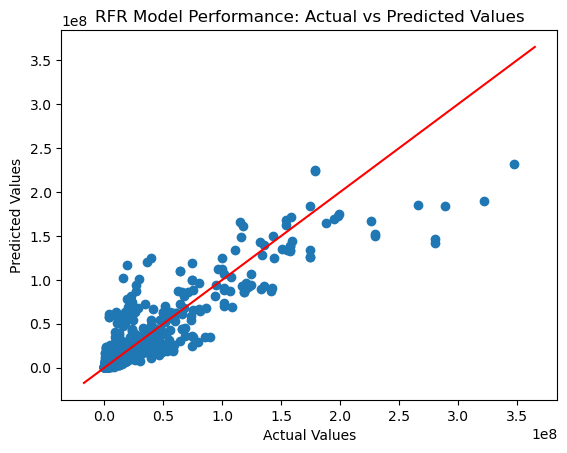

In [118]:
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RFR Model Performance: Actual vs Predicted Values')


# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

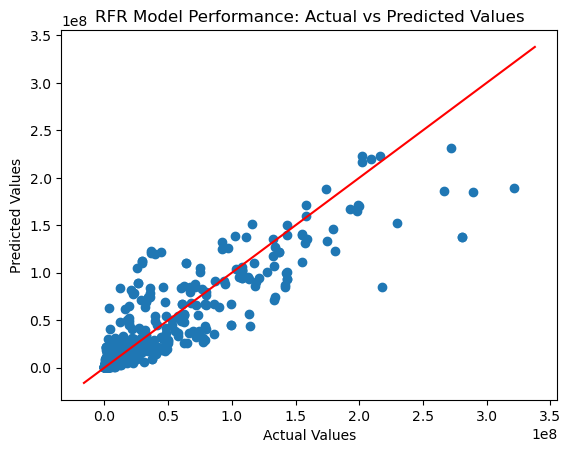

,Actual,Predicted
0,166383.41,4.936492e+05
1,123889.89,4.936492e+05
2,1536174.95,6.173158e+06
3,2111223.37,3.978960e+06
4,1594627.94,4.294409e+06
...,...,...
1535,269639.60,1.217895e+06
1536,1761368.40,2.799149e+06
1537,22001926.78,2.838415e+07
1538,5883799.95,3.085793e+06


In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Make predictions
predictionsVal = model.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, predictionsVal)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RFR Model Performance: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

# Convert y_val and predictionsVal to 1-dimensional arrays
y_val = np.ravel(y_val)
predictionsVal = np.ravel(predictionsVal)

# Create a DataFrame from y_val and predictionsVal
results = pd.DataFrame({'Actual': y_val, 'Predicted': predictionsVal})

# Display the DataFrame
results.head(1540)

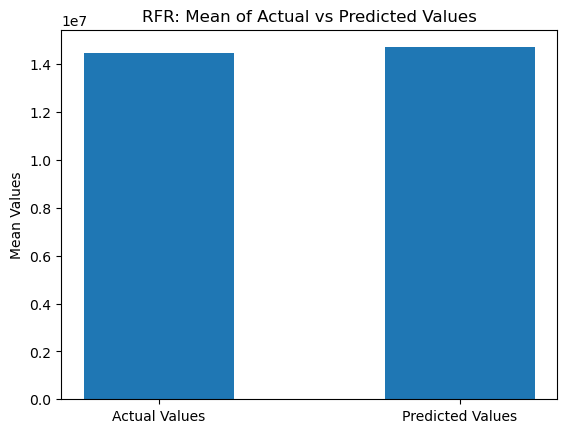

[14470959.341590911, 14711793.009902751]

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
predictions = model.predict(X_val)

# Calculate means
mean_actual = np.mean(y_val)
mean_predicted = np.mean(predictionsVal)

# Ensure mean_actual and mean_predicted are scalar values
mean_actual = mean_actual.item()
mean_predicted = mean_predicted.item()

# Create a bar graph
labels = ['Actual Values', 'Predicted Values']
values = [mean_actual, mean_predicted]
plt.bar(labels, values, width=0.5)

plt.ylabel('Mean Values')
plt.title('RFR: Mean of Actual vs Predicted Values')

plt.show()

values

In [121]:
import pandas as pd
import numpy as np

# Ensure y_test and predictions are 1-dimensional
y_test = np.ravel(y_test)
predictions = np.ravel(predictions)

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': ['{:.2f}'.format(pred) for pred in predictions]})

# Display the DataFrame
print(df.head(20).to_string(index=True))

ValueError: All arrays must be of the same length

In [122]:
# r2 = pipeline.score(X_test, y_test)
# print(f'R-squared (Test): {r2}')